# Scatterplots, Correlation, Jitter and Transparency

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## `matplotlib.pyplot.scatter`

Syntax: `matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ... , data=None, **kwargs)`

A scatter plot of y vs. x with varying marker size and/or color.

In [2]:
# loading dataset
fuel_econ = pd.read_csv("data/fuel_econ.csv")
fuel_econ

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


### Scatter plot showing negative correlation between two variables

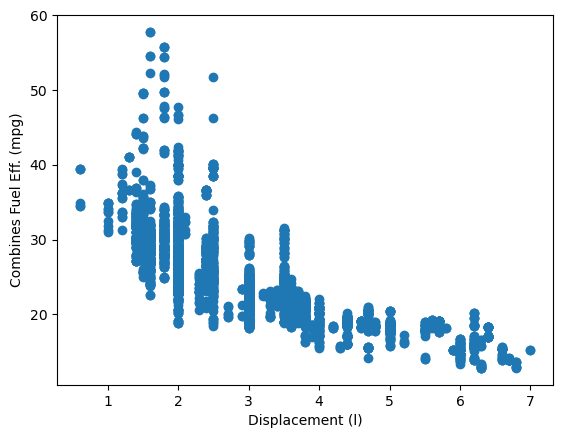

In [3]:
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combines Fuel Eff. (mpg)');

## `seaborn.regplot`

Syntax: `seaborn.regplot(data=None, *, x=None, y=None, scatter=True, fit_reg=True, ..., ax=None)`

Plot data and a linear regression model fit.

### Scatter plot showing negative correlation between two variables

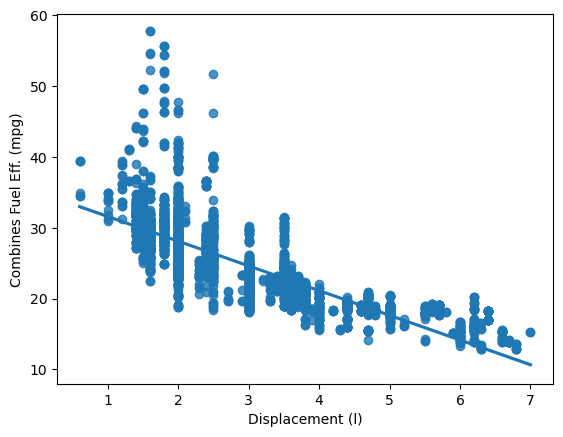

In [4]:
sns.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combines Fuel Eff. (mpg)');

### Plot the regression line on the transformed data

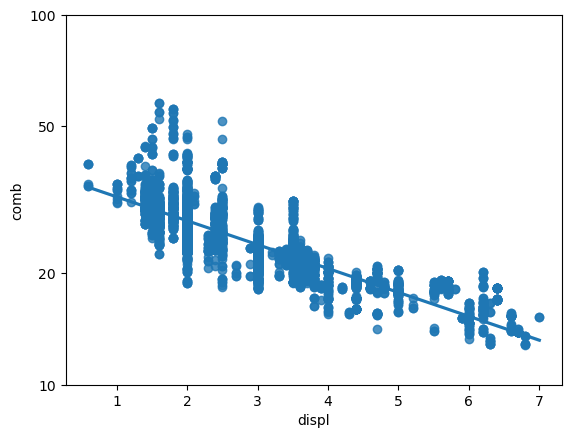

In [5]:
sns.regplot(x = fuel_econ['displ'], y=fuel_econ['comb'].apply(np.log10))
tick_locs = [10, 20, 50, 100]
plt.yticks(np.log10(tick_locs), tick_locs);

### Jitter - Randomly add/subtract a small value to each data point

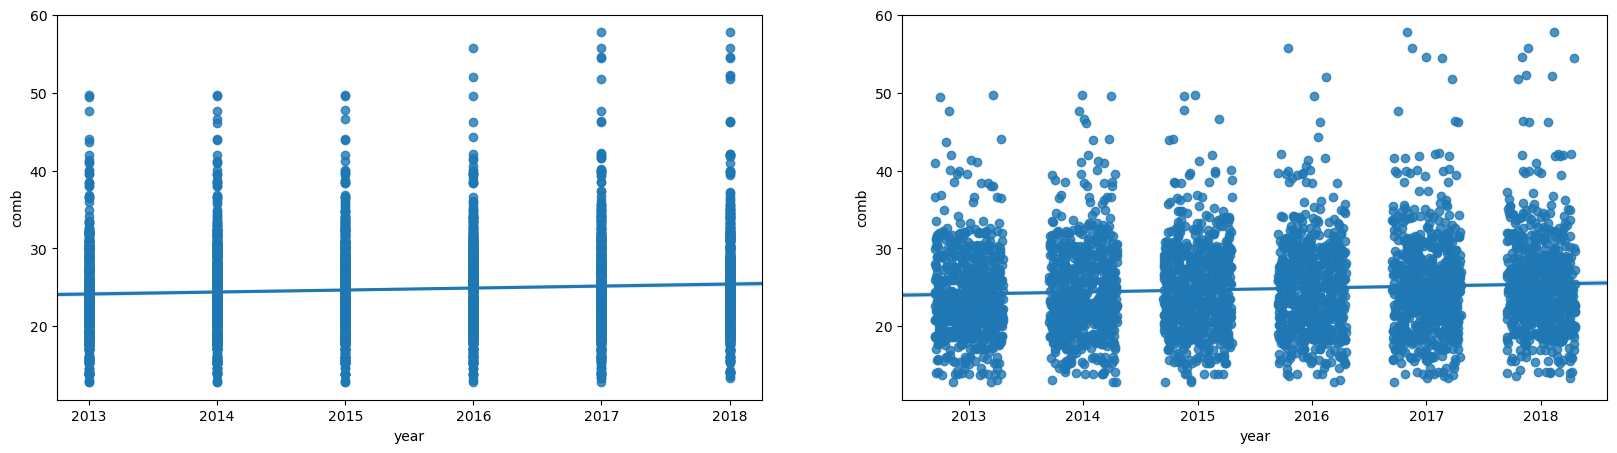

In [42]:
plt.figure(figsize=[20, 5])

# plot on left - simple scatter
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='year', y='comb', truncate=False)

# plot on right - scatter with jitter
plt.subplot(1, 2, 2)
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=.3, truncate=False);

### Plot with both Jitter and Transparency

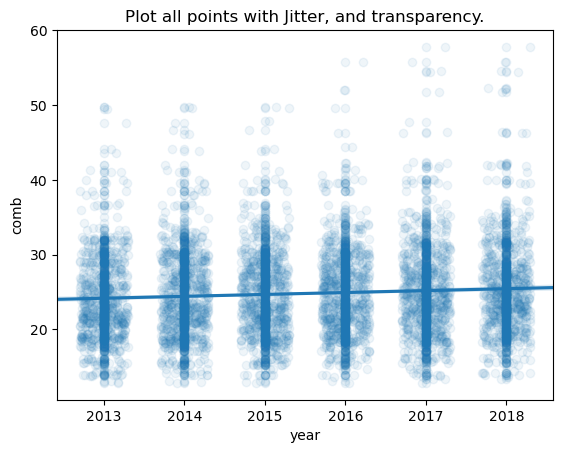

In [53]:
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=.3, truncate=False,
            scatter_kws={'alpha':.07}, color=sns.color_palette()[0])

plt.scatter(data=fuel_econ, x='year', y='comb', alpha=.07)

plt.title("Plot all points with Jitter, and transparency.");